In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pymysql
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

pandas → data manipulation (DataFrame)

numpy → numerical operations

matplotlib.pyplot → plotting/visualization

seaborn → statistical data visualization (built on top of matplotlib)

warnings → suppressing unnecessary warnings

pymysql → MySQL connector for Python

scipy.stats → statistical functions like ttest_ind

In [2]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

# ---- Database Connection ----
user = "root"            # your MySQL username
password = "abirsql2004"  # your MySQL password
host = "localhost"       # or "127.0.0.1"
port = 3306              # default MySQL port
database = "inventory"   # your database name

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# ---- Fetching Vendor Summary Data ----
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", engine)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,137362.0,4.937921e+06,655569.24,252387.29,68601.68,1126669.78,22.816681,0.946802,1.295617,1.295617
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,209.32,821466.04,17.759480,0.936186,1.215946,1.215946
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,144719.92,821466.04,17.759480,0.936186,1.215946,1.215946
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,181902.0,4.415080e+06,449230.72,334229.60,123780.22,996776.30,22.576631,0.970625,1.291600,1.291600
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,190928.0,4.276904e+06,409722.93,350816.39,257032.07,1015705.78,23.748624,0.946678,1.311452,1.311452


# Exploratory Data Analysis->

@ Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which once should be included in the final analysis.

@ In the phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us Understand data Patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [3]:
#Summary Statistics
df.describe().T # here .T means transpose means columns are go to row side and rows are goinf to column side.

,count,mean,std,min,25%,50%,75%,max
VendorNumber,12489.0,9672.998799,17519.491679,2.000000,3960.000000,4425.000000,9552.000000,2.013590e+05
Brand,12489.0,18847.561134,12524.982470,58.000000,6919.000000,19693.000000,25827.000000,9.063100e+04
PurchasePrice,12489.0,24.892217,103.582221,0.360000,7.140000,10.800000,20.430000,5.681810e+03
ActualPrice,12489.0,36.601191,141.237886,0.490000,10.990000,16.990000,29.990000,7.499990e+03
Volume,12489.0,838.294819,642.695329,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,12489.0,2946.748178,10618.653774,1.000000,36.000000,240.000000,1805.000000,3.376600e+05
TotalPurchaseDollars,12489.0,28401.808572,120334.186143,0.710000,472.860000,3545.640000,19227.600000,3.811252e+06
TotalSalesQuantity,12489.0,2759.635279,10079.016802,0.000000,30.000000,227.000000,1639.000000,3.240360e+05
TotalSalesDollars,12489.0,38205.193213,157037.668280,0.000000,719.920000,4842.450000,24958.950000,4.937921e+06
TotalSalesPrice,12489.0,16866.021700,41301.697187,0.000000,298.770000,2588.150000,14041.190000,6.555692e+05


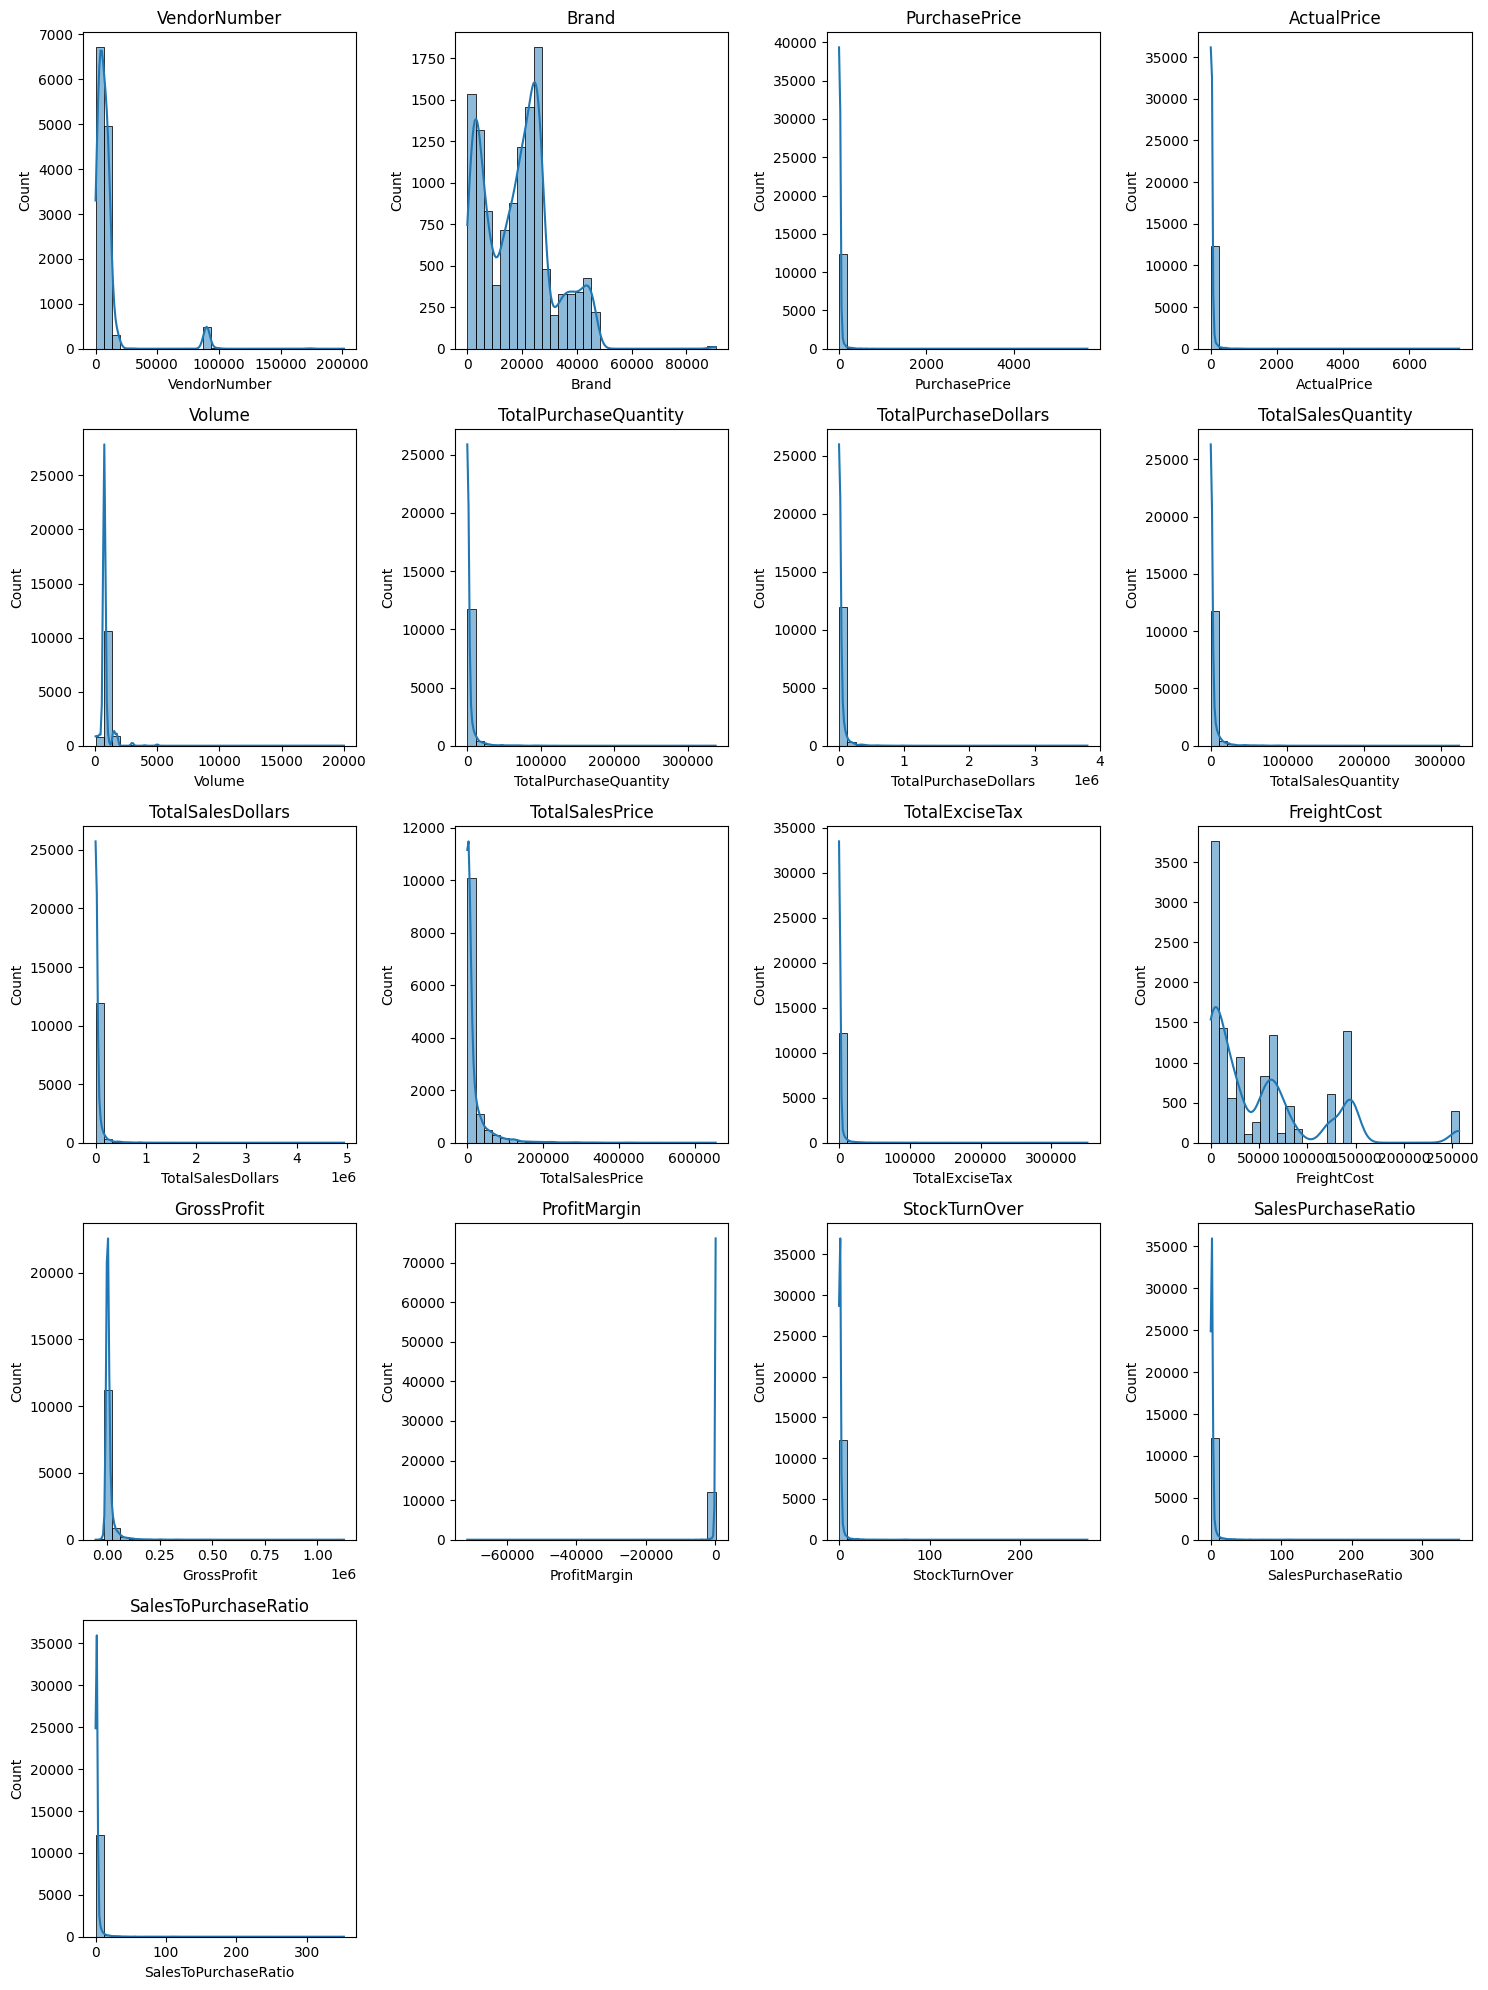

In [20]:
import math

# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = 4   # number of columns in subplot grid
n_rows = math.ceil(len(numerical_cols) / n_cols)  # calculate needed rows

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


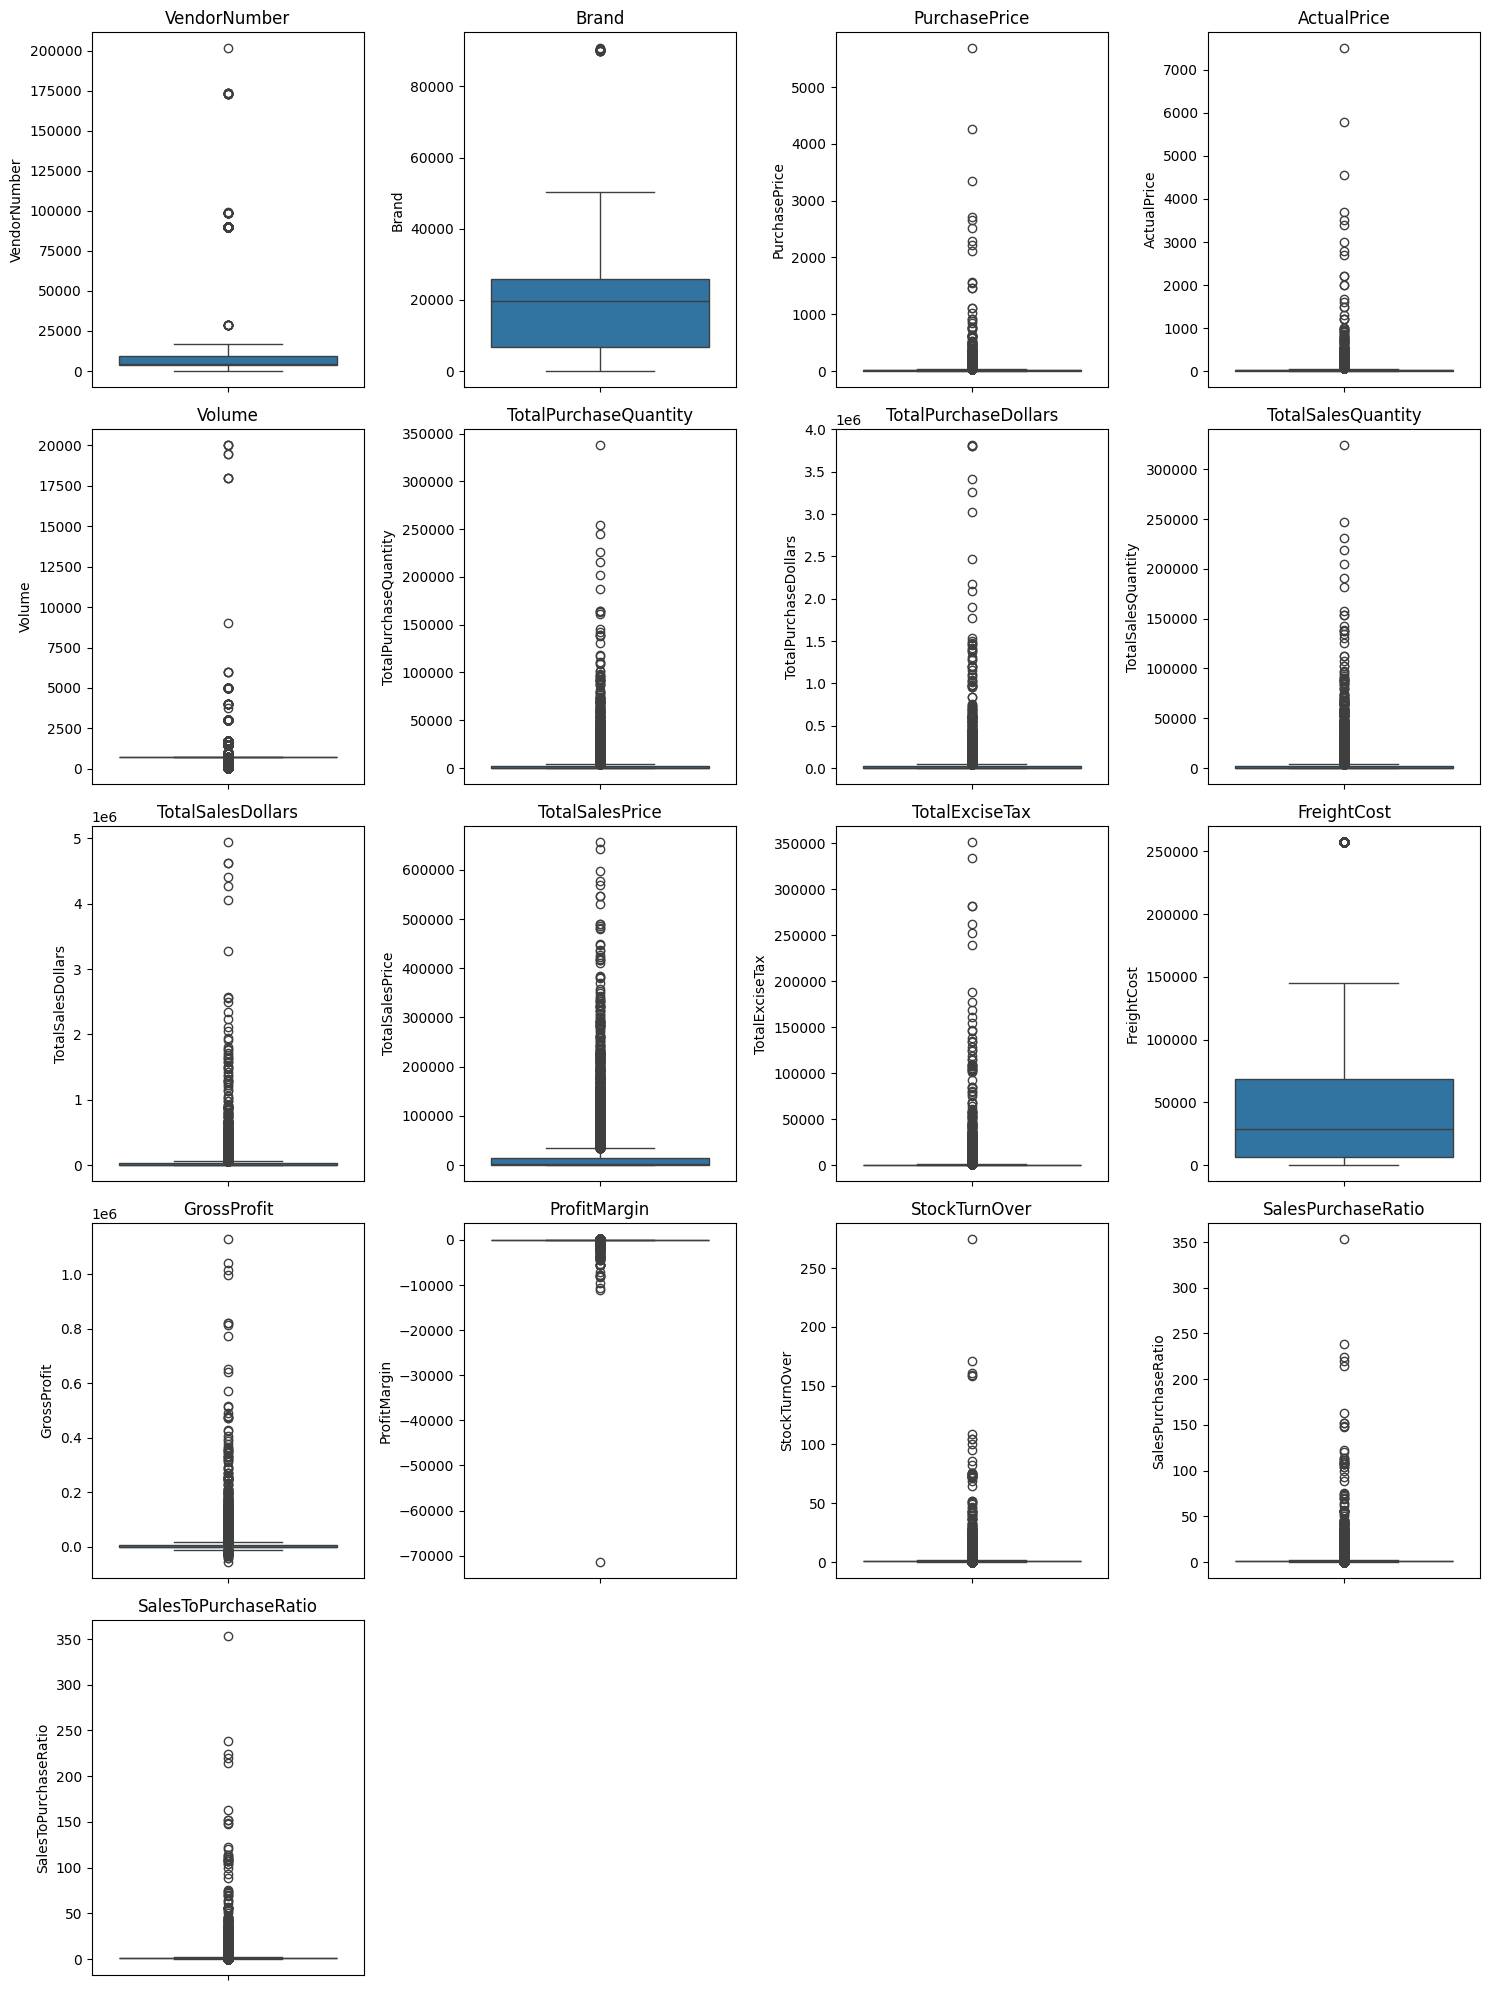

In [21]:
import math

n_cols = 4
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [22]:
import numpy as np

# Summary statistics
summary = df.describe(include=[np.number]).T  # Transpose for readability

print(summary[['mean', 'std', 'min', 'max']])


                               mean            std           min           max
VendorNumber            9672.998799   17519.491679      2.000000  2.013590e+05
Brand                  18847.561134   12524.982470     58.000000  9.063100e+04
PurchasePrice             24.892217     103.582221      0.360000  5.681810e+03
ActualPrice               36.601191     141.237886      0.490000  7.499990e+03
Volume                   838.294819     642.695329     50.000000  2.000000e+04
TotalPurchaseQuantity   2946.748178   10618.653774      1.000000  3.376600e+05
TotalPurchaseDollars   28401.808572  120334.186143      0.710000  3.811252e+06
TotalSalesQuantity      2759.635279   10079.016802      0.000000  3.240360e+05
TotalSalesDollars      38205.193213  157037.668280      0.000000  4.937921e+06
TotalSalesPrice        16866.021700   41301.697187      0.000000  6.555692e+05
TotalExciseTax          1522.790089   10150.760357      0.000000  3.508164e+05
FreightCost            52594.266657   60308.599732  

In [23]:
col = 'ProfitMargin'

mean_val = df[col].mean()
min_val = df[col].min()
max_val = df[col].max()
std_val = df[col].std()

print(f"{col} → Mean: {mean_val}, Min: {min_val}, Max: {max_val}, Std: {std_val}")


ProfitMargin → Mean: -32.15296004178368, Min: -71391.9168591224, Max: 99.71655328798185, Std: 744.2961987811173


# SUMMARY STATISTICS INSIGHTS->

# Negative & Zero Values:

Gross Profit: The minimum value is -55678.95, suggesting losses. This can happen if products are sold below cost price or with very high expenses.

Profit Margin: The minimum value is -71391.91, which occurs when revenue is zero or even less than costs.

Total Sales Quantity & Sales Dollars: Both have minimum values of 0, meaning some products were purchased but never sold. These might represent obsolete or slow-moving stock.

# Outliers Detected (High Standard Deviations):

Purchase & Actual Prices: Maximum values (5,681.81 and 7,499.99) are much higher than the mean (24.89 and 36.60), suggesting premium or luxury products.

Freight Cost: Ranges from 0.09 to 257,032.07, indicating large variation possibly due to bulk shipments or logistics inefficiencies.

Stock Turnover: Varies from 0 to 274.4, showing that some products sell extremely quickly while others remain unsold for long periods. Values above 1 suggest that sold quantities are higher than purchased quantities, likely because older stock is being sold.

In [24]:
#let's filter out the data by removing inconsistency
df = pd.read_sql_query("""
SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
""", engine)

In [25]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,137362.0,4.937921e+06,655569.24,252387.29,68601.68,1126669.78,22.816681,0.946802,1.295617,1.295617
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,209.32,821466.04,17.759480,0.936186,1.215946,1.215946
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,144719.92,821466.04,17.759480,0.936186,1.215946,1.215946
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,181902.0,4.415080e+06,449230.72,334229.60,123780.22,996776.30,22.576631,0.970625,1.291600,1.291600
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,190928.0,4.276904e+06,409722.93,350816.39,257032.07,1015705.78,23.748624,0.946678,1.311452,1.311452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2.0,2.84,14.0,2.786000e+01,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859,9.809859
9689,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667
9690,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829
9691,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,69.0,1.373100e+02,71.64,14.49,257032.07,135.84,98.929430,69.000000,93.408163,93.408163


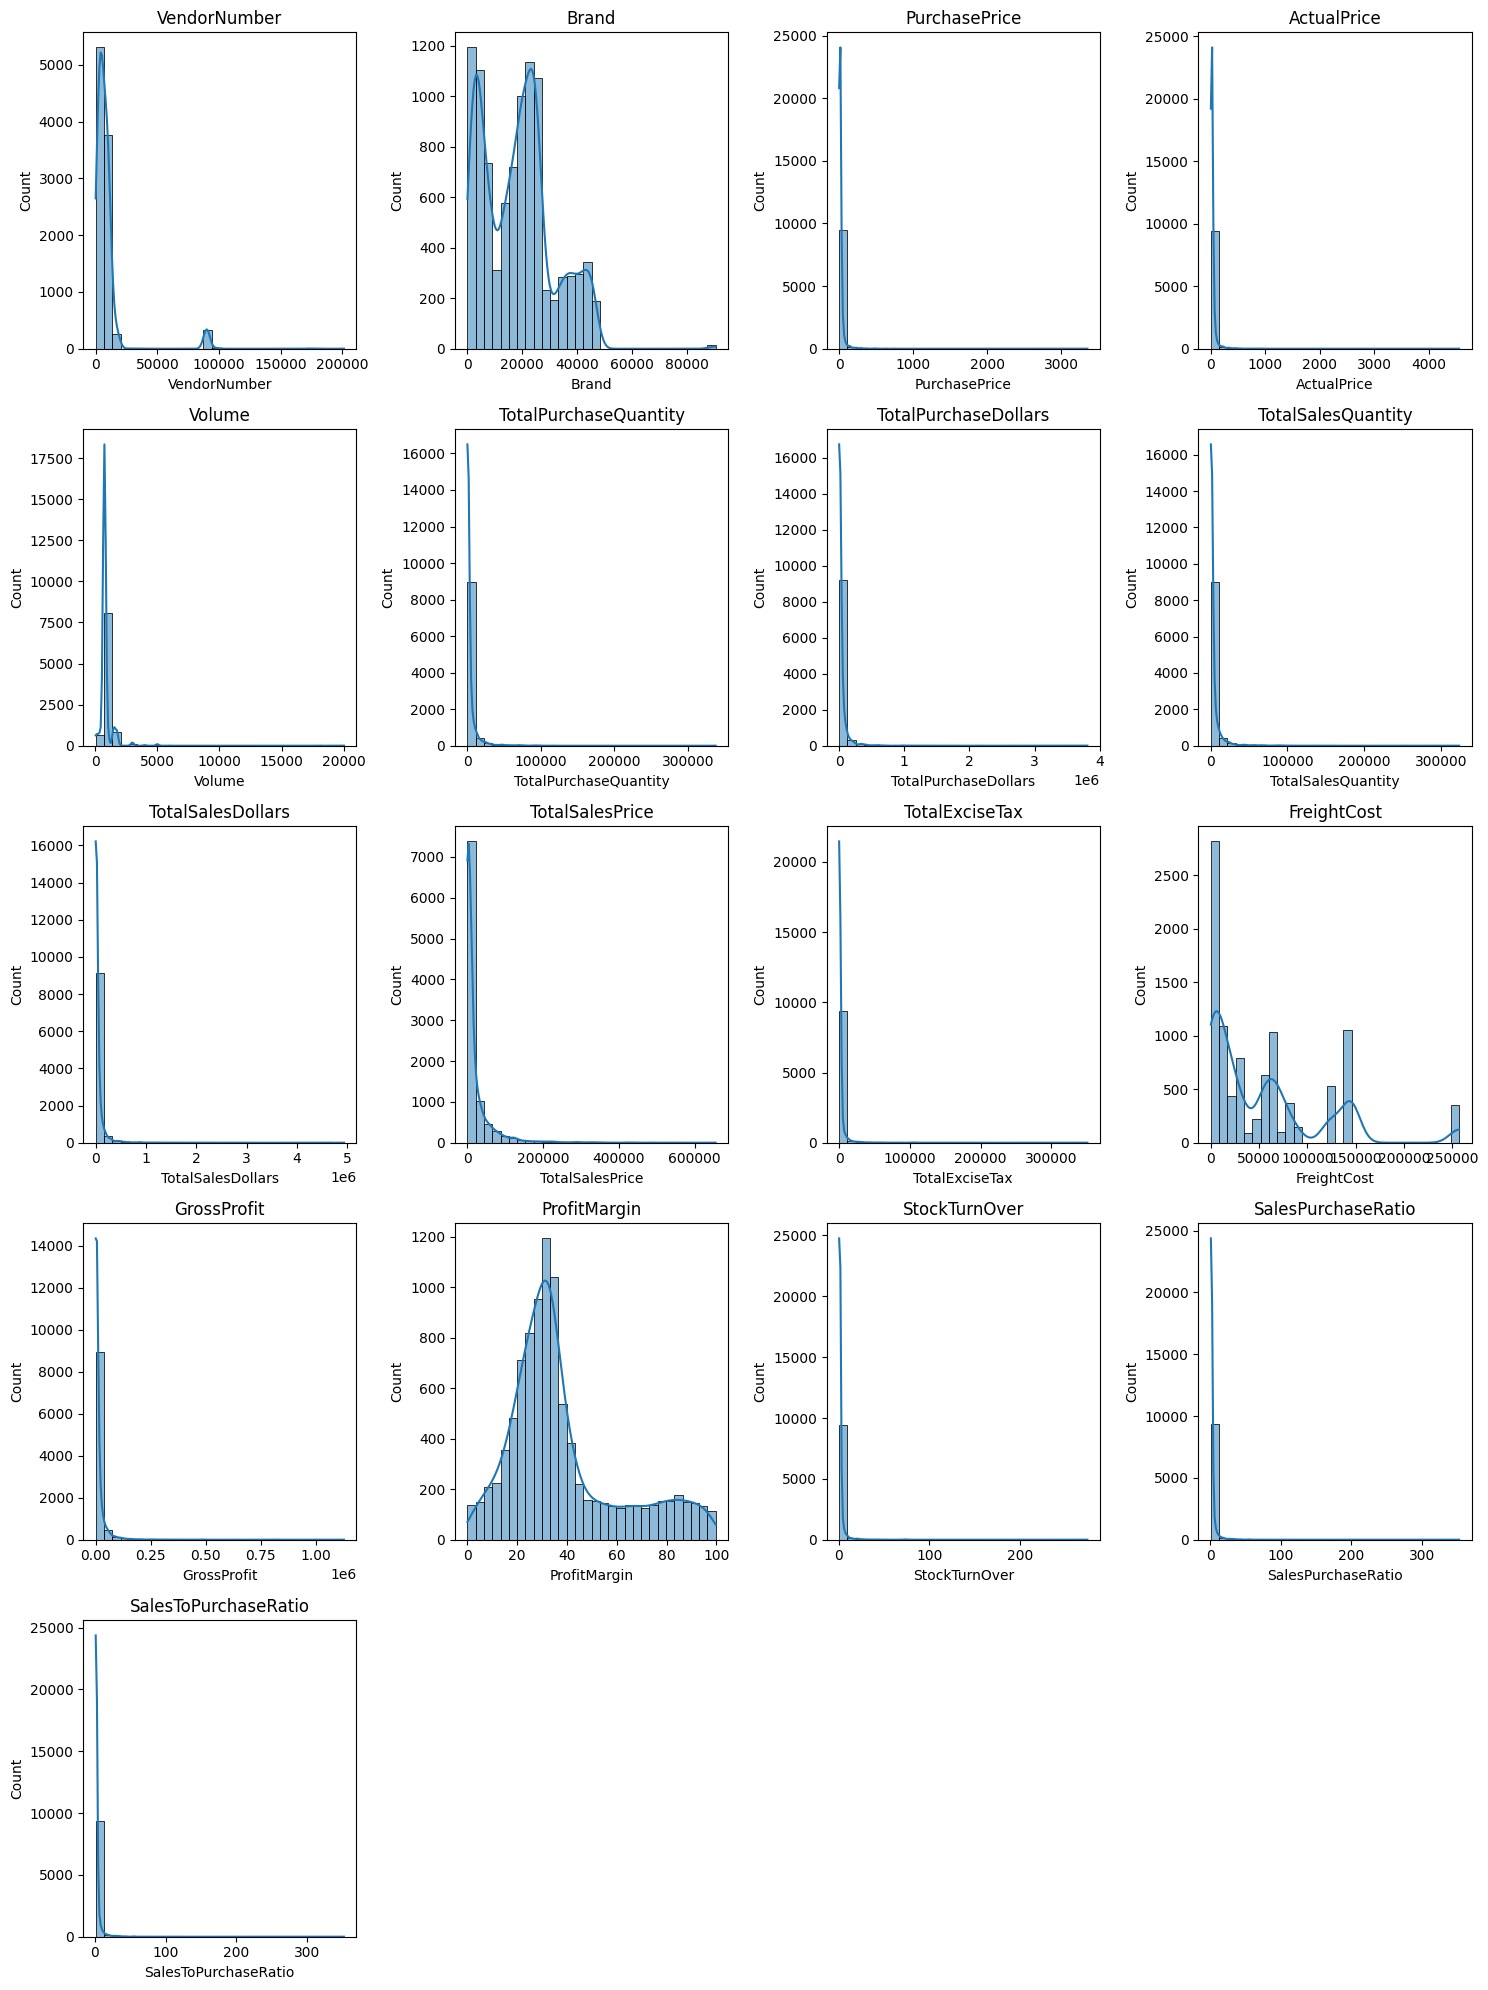

In [26]:
import math
# After cleaning the data
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = 4   # number of columns in subplot grid
n_rows = math.ceil(len(numerical_cols) / n_cols)  # calculate needed rows

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


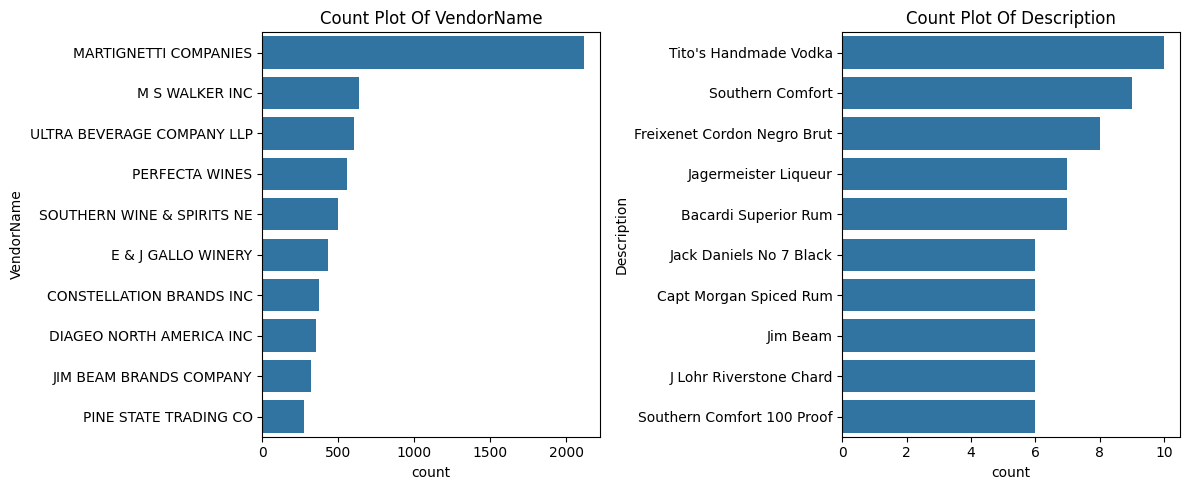

In [27]:
# count plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) #TOP 10 Categories
    plt.title(f"Count Plot Of {col}")
plt.tight_layout()
plt.show()

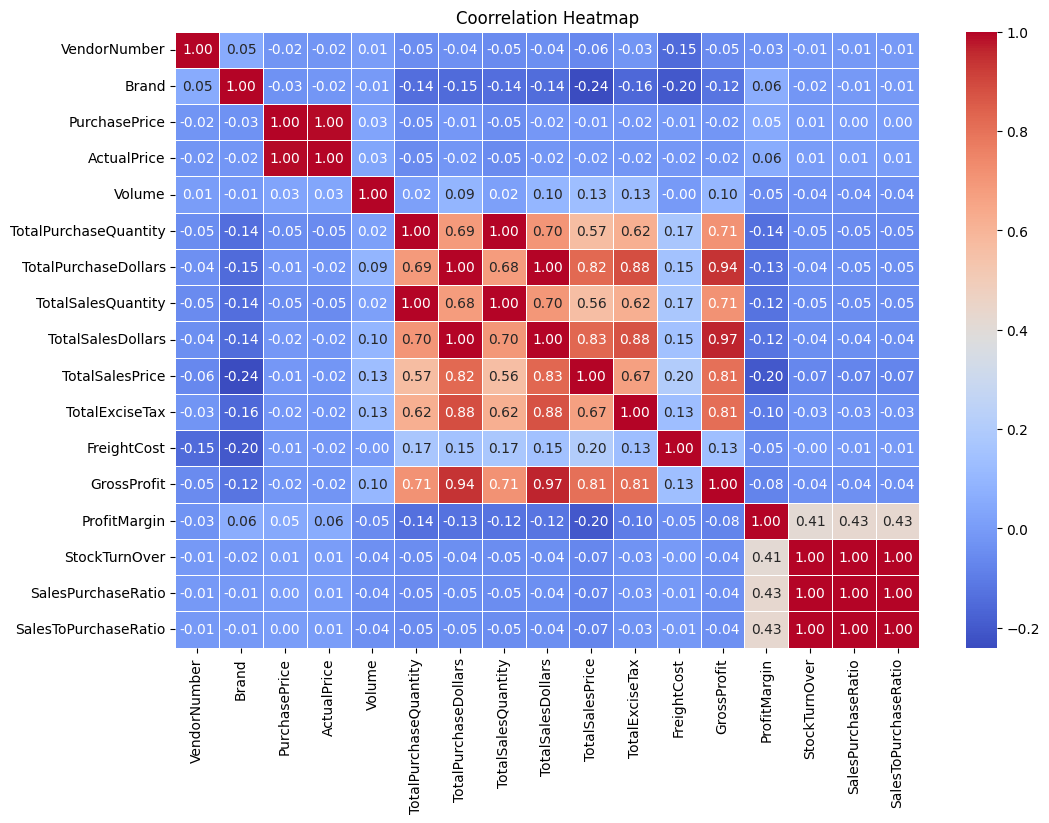

In [28]:
#Coorrelation Heatmap
plt.figure(figsize=(12, 8))
coorrelation_matrix = df[numerical_cols].corr()
sns.heatmap(coorrelation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Coorrelation Heatmap")
plt.show()

# Key Correlation Highlights 📊
# Strong Sales & Purchase Relationship: There is a near-perfect correlation (0.99) between purchase quantities/dollars and sales quantities/dollars. This indicates a highly efficient inventory system where goods that are bought are sold very effectively.

# Brand Power Drives Revenue: Brand is a major factor, showing a strong positive correlation with TotalSalesPrice (0.93) and TotalSalesDollars (0.94). This means popular brands successfully command higher prices and generate more revenue.

# Price is Key to Profitability: TotalSalesPrice is strongly linked to GrossProfit (0.97) and ProfitMargin (0.94). Higher selling prices are the most significant driver of overall profit.

# Freight Costs Erode Margins: While higher FreightCost is associated with larger orders and thus higher GrossProfit (0.80), it has a slightly negative impact on the ProfitMargin (-0.10). This highlights that shipping expenses can reduce overall profitability even on high-revenue sales.

# Vendor Choice is Insignificant: VendorNumber has a very weak correlation (0.05) with sales and revenue, suggesting that which vendor is used has little to no impact on sales performance.

In [29]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [30]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,20638.34,14.563865
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2584.05,17.270951
3,10 Span Chard CC,3243.17,25.972428
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7478,Zorvino Vyds Pearz,19440.54,27.050637
7479,Zorvino Vyds Sangiovese,9579.83,22.175028
7480,Zuccardi Q Malbec,1279.36,2.601301
7481,Zum Rsl,10461.70,30.128947


In [31]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15) # below than 15 %
high_margin_threshold =brand_performance['ProfitMargin'].quantile(0.85) # higher than 85% 

In [32]:
low_sales_threshold

np.float64(599.648)

In [33]:
high_margin_threshold

np.float64(65.49949331096498)

# Target those brands whose sales less than 599.648  and Profimargin is higher than 65%

In [34]:
#Filter Brands with low sales but high margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands With Low Sales But High Profit Margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands With Low Sales But High Profit Margins: 


,Description,TotalSalesDollars,ProfitMargin
6033,Santa Rita Organic Svgn Bl,9.99,66.466466
2306,Debauchery Pnt Nr,11.58,65.975820
2021,Concannon Glen Ellen Wh Zin,15.95,83.448276
2134,Crown Royal Apple,27.86,89.806174
6070,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
3327,Gruet Bl de Bl 25th Annivrsy,588.69,66.705736
2099,Courvoisier Rose,591.68,93.155084
7299,West Indies Blue Mtn Coffee,593.82,91.387963
4687,Merriam Cab Franc Windacre V,594.83,80.523847


In [35]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']< 10000] # For better visulization

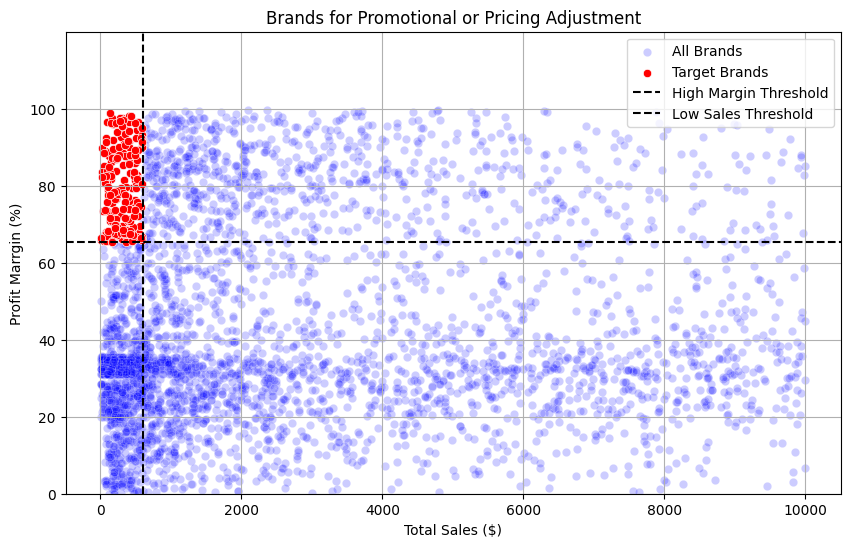

In [36]:
# SHow ScatterPlot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "blue", label = "All Brands", alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "red", label = "Target Brands")

plt.axhline(high_margin_threshold, linestyle = '--', color = 'Black', label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle = '--', color = 'Black', label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Marrgin (%)")
plt.title("Brands for Promotional or Pricing Adjustment")
# --- ADD THESE TWO LINES ---
plt.ylim(0, 120) # Sets the y-axis range from 0 to 105 (a little extra space at the top)
plt.yticks([0, 20, 40, 60, 80, 100]) # Sets the specific tick marks you want
plt.legend()
plt.grid(True)
plt.show()

# Second Problem
Which Vendors and Brands Demonstrate the highest Sales Performance?

In [37]:
#Top Vendors & Brands By Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [38]:
top_vendors

VendorName
MARTIGNETTI COMPANIES         7.434287e+07
DIAGEO NORTH AMERICA INC      6.408270e+07
PERNOD RICARD USA             3.030204e+07
JIM BEAM BRANDS COMPANY       2.977426e+07
BACARDI USA INC               2.385015e+07
CONSTELLATION BRANDS INC      2.315610e+07
E & J GALLO WINERY            1.753971e+07
BROWN-FORMAN CORP             1.706064e+07
ULTRA BEVERAGE COMPANY LLP    1.556605e+07
M S WALKER INC                1.394368e+07
Name: TotalSalesDollars, dtype: float64

In [39]:
top_brands

Description
Tito's Handmade Vodka      14155531.18
Jack Daniels No 7 Black     7680860.08
Grey Goose Vodka            6963487.93
Capt Morgan Spiced Rum      6064214.00
Absolut 80 Proof            6051322.93
Jameson Irish Whiskey       5361792.54
Ketel One Vodka             4869887.46
Baileys Irish Cream         3842713.00
Kahlua                      3415678.11
Tanqueray                   3330240.64
Name: TotalSalesDollars, dtype: float64

Here the Dollars are in number but i want in k or M

In [6]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value / 1_000_000: .2f}M"
    elif value >= 1_000:
        return f"{value / 1_000: .2f}K"
    else:
        return str(value)


In [41]:
top_brands.apply(lambda x : format_dollars(x))

Description
Tito's Handmade Vodka       14.16M
Jack Daniels No 7 Black      7.68M
Grey Goose Vodka             6.96M
Capt Morgan Spiced Rum       6.06M
Absolut 80 Proof             6.05M
Jameson Irish Whiskey        5.36M
Ketel One Vodka              4.87M
Baileys Irish Cream          3.84M
Kahlua                       3.42M
Tanqueray                    3.33M
Name: TotalSalesDollars, dtype: object

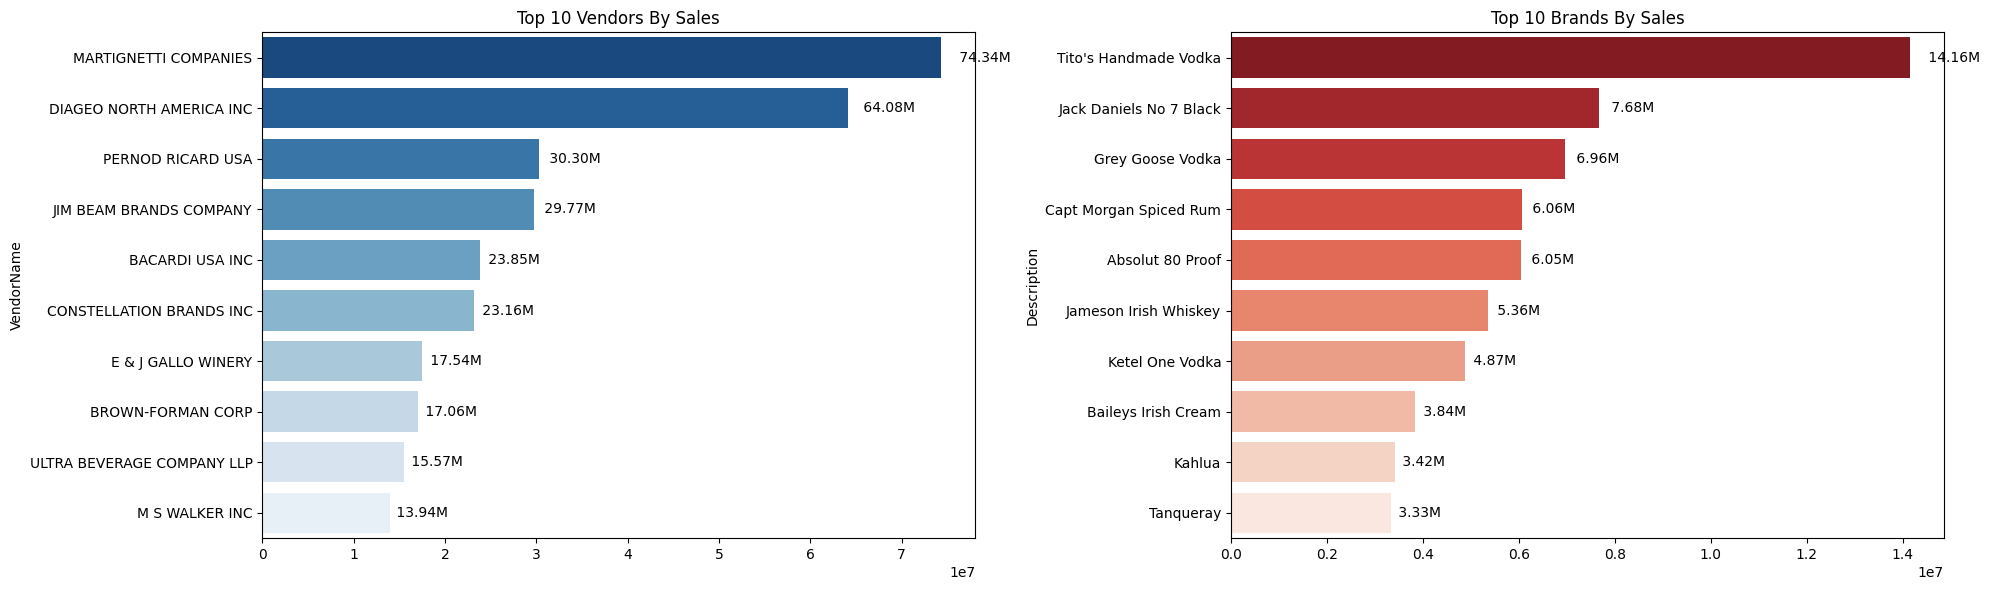

In [42]:
# Plot the Data using Bar Graph
plt.figure(figsize=(20, 6))

#plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors By Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha = 'left', va = 'center', fontsize = 10, color = 'black')


#plot for Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette = "Reds_r")
plt.title("Top 10 Brands By Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha ='left', va ='center', fontsize = 10, color='black')

plt.tight_layout()
plt.show()

# Which Vendors contribute the most to total purchase dollars?

In [43]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [44]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,72638.44,98336.56
2,ALTAMAR BRANDS LLC,11706.20,3400.73,15106.93
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,29192.45,133628.13
...,...,...,...,...
114,WEIN BAUER INC,42694.64,10074.41,52769.05
115,WESTERN SPIRITS BEVERAGE CO,272579.98,90221.92,362801.90
116,WILLIAM GRANT & SONS INC,5787695.32,1275220.84,7062916.16
117,WINE GROUP INC,5203120.17,2817659.96,8020780.13


In [54]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [55]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [56]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
57,MARTIGNETTI COMPANIES,50.40M,23.94M,74.34M,15.14
25,DIAGEO NORTH AMERICA INC,49.21M,14.87M,64.08M,14.78
68,PERNOD RICARD USA,23.60M,6.70M,30.30M,7.09
46,JIM BEAM BRANDS COMPANY,23.07M,6.70M,29.77M,6.93
6,BACARDI USA INC,17.34M,6.51M,23.85M,5.21
20,CONSTELLATION BRANDS INC,15.19M,7.97M,23.16M,4.56
11,BROWN-FORMAN CORP,12.85M,4.21M,17.06M,3.86
30,E & J GALLO WINERY,12.02M,5.52M,17.54M,3.61
106,ULTRA BEVERAGE COMPANY LLP,10.92M,4.64M,15.57M,3.28
79,SAZERAC CO INC,9.68M,2.82M,12.50M,2.91


In [57]:
top_vendors['PurchaseContribution%'].sum()

np.float64(67.36999999999999)

In [58]:
#Cumulative Contribution
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
57,MARTIGNETTI COMPANIES,50.40M,23.94M,74.34M,15.14,15.14
25,DIAGEO NORTH AMERICA INC,49.21M,14.87M,64.08M,14.78,29.92
68,PERNOD RICARD USA,23.60M,6.70M,30.30M,7.09,37.01
46,JIM BEAM BRANDS COMPANY,23.07M,6.70M,29.77M,6.93,43.94
6,BACARDI USA INC,17.34M,6.51M,23.85M,5.21,49.15
20,CONSTELLATION BRANDS INC,15.19M,7.97M,23.16M,4.56,53.71
11,BROWN-FORMAN CORP,12.85M,4.21M,17.06M,3.86,57.57
30,E & J GALLO WINERY,12.02M,5.52M,17.54M,3.61,61.18
106,ULTRA BEVERAGE COMPANY LLP,10.92M,4.64M,15.57M,3.28,64.46
79,SAZERAC CO INC,9.68M,2.82M,12.50M,2.91,67.37


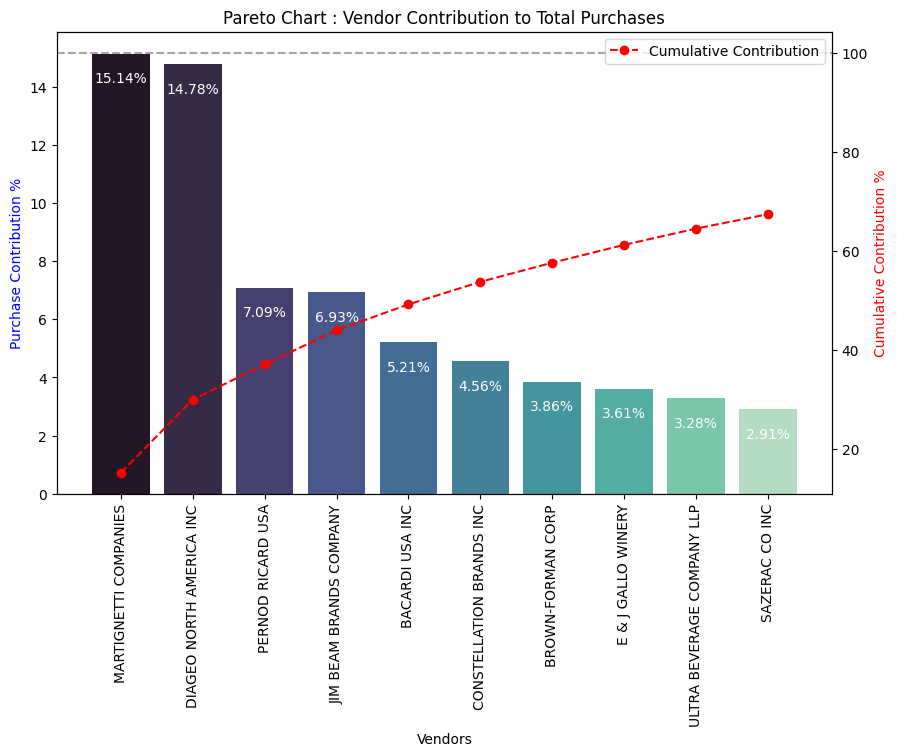

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 6))

#Bar plot for purchase contribution%
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = "mako", ax = ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha = 'center', fontsize = 10, color ='White')

#Line plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color = 'red', marker ='o', linestyle = 'dashed', label='Cumulative Contribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title("Pareto Chart : Vendor Contribution to Total Purchases")

ax2.axhline(y = 100, color ='gray', linestyle = 'dashed', alpha = 0.7)
ax2.legend(loc = 'upper right')

plt.show()

# How Much of total procurement is dependent on the top Vendors?

In [60]:
print(f"Total Purchase Contribution of top 10 Vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 Vendors is 67.37%


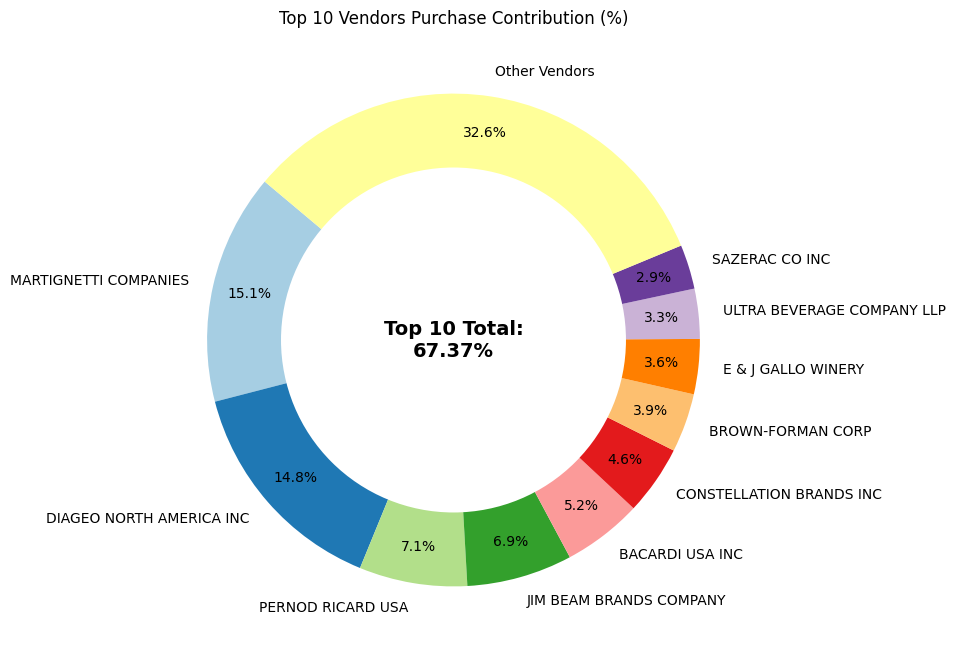

In [65]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append Other Vendors Category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels = vendors, autopct ='%1.1f%%',
                                 startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors
                                 )

#Draw a white circle in the center to create a Donut Chart
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

#Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize = 14, fontweight = 'bold', ha ='center', va = 'center')

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

# Does Purchasing in bulk reduce the unit price, and What is the optimal purchase volume for cost saving?

In [67]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [69]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,137362.0,4.937921e+06,655569.24,252387.29,68601.68,1126669.78,22.816681,0.946802,1.295617,1.295617,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,209.32,821466.04,17.759480,0.936186,1.215946,1.215946,23.19
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,153570.0,4.625507e+06,547133.33,282170.22,144719.92,821466.04,17.759480,0.936186,1.215946,1.215946,23.19
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,181902.0,4.415080e+06,449230.72,334229.60,123780.22,996776.30,22.576631,0.970625,1.291600,1.291600,18.24
4,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,190928.0,4.276904e+06,409722.93,350816.39,257032.07,1015705.78,23.748624,0.946678,1.311452,1.311452,16.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2.0,2.84,14.0,2.786000e+01,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859,9.809859,1.42
9689,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667,1.32
9690,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829,0.39
9691,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,69.0,1.373100e+02,71.64,14.49,257032.07,135.84,98.929430,69.000000,93.408163,93.408163,1.47


In [71]:
#Based on 3 quantiles it makes buckets and divide ordersize into this buckets
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['Small', 'Medium', 'Large'])


In [74]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080.0
1,Large,164038.0
2,Large,164038.0
3,Large,187407.0
4,Large,201682.0
...,...,...
9688,Small,2.0
9689,Small,2.0
9690,Small,6.0
9691,Small,1.0


In [76]:
#Unit Purchase Price Mean
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,40.893741
Medium,15.245568
Large,10.789873


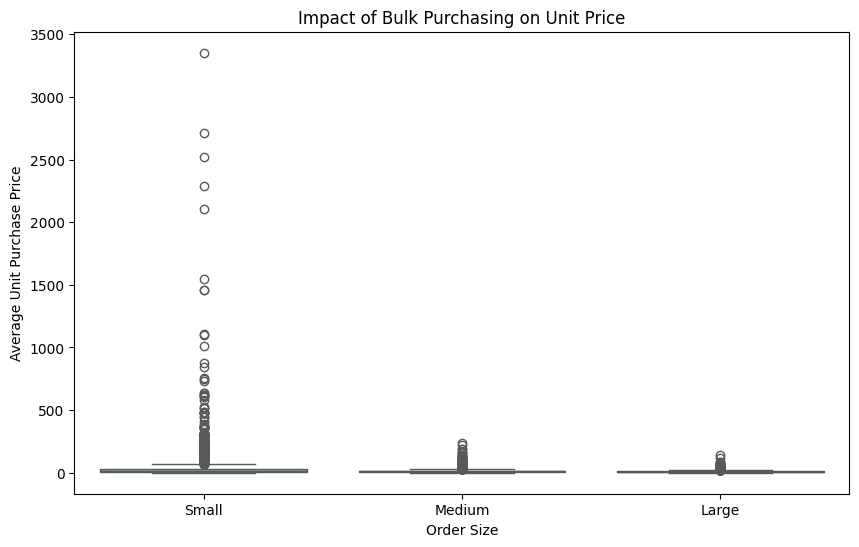

In [78]:
#plot using boxplot
plt.figure(figsize =(10, 6))
sns.boxplot(data = df, x = 'OrderSize', y = 'UnitPurchasePrice', palette = 'Set2')

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

Vendors purchasing in bulk (large order sizes) secure the lowest unit cost ($10.78 per unit), which can translate into higher profit margins if inventory is managed effectively.

The cost gap between small and large orders is significant, with approximately a 72% reduction in unit price for larger orders.

This indicates that bulk pricing strategies effectively motivate vendors to buy in higher volumes, boosting overall sales even though the per-unit revenue is lower.

# Which vendor have low inventory turnover, indicating excess stock and slow moving products?

In [81]:
df[df['StockTurnOver'] < 1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending = True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
WALPOLE MTN VIEW WINERY,0.730771
Dunn Wine Brokers,0.747301
SOUTHERN GLAZERS W&S OF NE,0.761876
Circa Wines,0.763511
CENTEUR IMPORTS LLC,0.772988
FULCHINO VINEYARD INC,0.783786
TAMWORTH DISTILLING,0.784903


# How much Capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [7]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print("Total Unsold Capital: ", format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital:   25.94M


In [14]:
# Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the highest Locked Capital
inventory_values_per_vendor = inventory_value_per_vendor.sort_values(
    by='UnsoldInventoryValue',
    ascending=False
)

# Format values into dollars (or any currency format)
inventory_values_per_vendor['UnsoldInventoryValue'] = inventory_values_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Show top 10 vendors
inventory_values_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
63,MARTIGNETTI COMPANIES,4.59M
28,DIAGEO NORTH AMERICA INC,3.30M
50,JIM BEAM BRANDS COMPANY,1.82M
74,PERNOD RICARD USA,1.69M
114,ULTRA BEVERAGE COMPANY LLP,1.37M
59,M S WALKER INC,0.98M
14,BROWN-FORMAN CORP,0.91M
23,CONSTELLATION BRANDS INC,0.90M
33,E & J GALLO WINERY,0.87M
73,PERFECTA WINES,0.84M


# What is the 95% confidence intervals for profit margins of top-performing and low performing vendors.